In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt

In [ ]:
# import dataset
x = pd.read_csv('/content/drive/My Drive/hw1/train_data.csv',header=None)
x



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = pd.read_csv('/content/drive/My Drive/hw1/train_labels.csv',header=None)
y

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
24749,0.0,0.0,1.0,0.0
24750,1.0,0.0,0.0,0.0
24751,0.0,0.0,1.0,0.0
24752,0.0,1.0,0.0,0.0


In [ ]:
# merge sameples and labels 
dataset = np.append(x,y,axis=1)
dataset.shape



(24754, 788)

In [ ]:
#shuffle the dataset
np.random.shuffle(dataset)
row,col = dataset.shape
pct = 0.2
train,test = dataset[int(row*pct):],dataset[:int(row*pct)]
train.shape

(19804, 788)

In [ ]:
test.shape

(4950, 788)

In [ ]:
train_x = train[:,:-4]
test_x = test[:,:-4]
# train_x.shape
# test_x.shape

train_y = train[:,-4:]
test_y = test[:,-4:]
train_y.shape
test_y.shape

(4950, 4)

In [ ]:
# define activate functions

def sigmod(x):
    return 1.0/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
      expx = np.exp(x - np.max(x))
      return expx / expx.sum(axis=0, keepdims=True)  



In [ ]:
# define layers


parameters = {}
weight_size=[]
d=784
M=[50,4]
layers_size = len(M)
weight={}


In [ ]:
# initialize parameters
np.random.seed(1)
for i in range(0,layers_size):
    if i==0:
        weight_size.append(M[0]*d)
        weighti=(np.empty(weight_size[i]).reshape(M[0],d))
        for j in range(0,M[0]):
            for k in range(0,d):
                weighti[j][k]=np.random.randn()
        weight[i]=weighti
    else:
        weight_size.append(M[i]*M[i-1])
        weighti=np.empty(weight_size[i]).reshape(M[i],M[i-1])
        for j in range(0,M[i]):
            for k in range(0,M[i-1]):
                weighti[j][k]=np.random.randn()
        weight[i]=weighti


for l in range(1,layers_size+1):
    
    parameters["W" + str(l)] = weight[l-1]
    s = parameters["W"+str(l)].shape
    parameters["b" + str(l)] = np.zeros((M[l-1],1))
    print(parameters["W"+str(l)].shape)


(50, 784)
(4, 50)


In [ ]:
def forward(x):
    x = train_x
    store = {}
    A=x.T
    print(layers_size)
    for l in range(layers_size-1):
        Z=parameters["W"+str(l+1)].dot(A)+parameters["b"+str(l+1)]
        A=sigmod(Z)
        #print(parameters["W"+str(l+1)])
        store["A"+str(l+1)]=A
        store["W"+str(l+1)]=parameters["W"+str(l+1)]
        store["Z"+str(l+1)]=Z
    #output layer
    Z=parameters["W"+str(layers_size)].dot(A)+parameters["b"+str(layers_size)] 
    A=softmax(Z)
    
    store["A"+str(layers_size)]=A    
    store["W"+str(layers_size)]=parameters["W"+str(layers_size)]
    store["Z"+str(layers_size)]=Z    

    return A,store




In [ ]:
def backward(x, y, store):
    x = train_x
    
    y = train_y
    derivatives = {}
    n = x.shape[0]
    store["A0"] = x.T

    A = store["A" + str(layers_size)]
    n = x.shape[0];

    dZ = A-y.T
    dW = dZ.dot(store["A" + str(layers_size - 1)].T) /n
    db = np.sum(dZ, axis=1,keepdims=True) /n
    dAPrev = store["W" + str(layers_size)].T.dot(dZ)
    
    derivatives["dW" + str(layers_size)] = dW
    derivatives["db" + str(layers_size)] = db

    for l in range(layers_size - 1, 0, -1):
        dZ = dAPrev * sigmoid_derivative(store["Z" + str(l)])
        dW = dZ.dot(store["A" + str(l - 1)].T)/n
        db =  np.sum(dZ, axis=1, keepdims=True)/n
        if l > 1:
            dAPrev = store["W" + str(l)].T.dot(dZ)

        derivatives["dW" + str(l)] = dW
        derivatives["db" + str(l)] = db

    return derivatives


In [ ]:
def train(x,y,learning_rate=0.01,n_iterations=10):
    np.random.seed(1)
  
    costs=[]
    for loop in range(n_iterations):
        A,store=forward(x)
        cost = -np.mean(y * np.log(A.T+ 1e-8))
        print(cost)
        print(A)
        print(A.shape)
        derivatives=backward(x,y,store)
        ## update parameters
        for l in range(1,layers_size+1):
            parameters["W"+str(l)]=parameters["W"+str(l)]-learning_rate*derivatives["dW"+str(l)]
            parameters["b"+str(l)]=parameters["b"+str(l)]-learning_rate*derivatives["db"+str(l)]
        #print(parameters)    
        #print(loop,cost)
        costs.append(cost)       

    return A,costs

2
1.4463578808357154
[[8.58877452e-01 4.44376670e-01 9.92385497e-01 ... 7.83172100e-01
  9.93701248e-01 7.15850544e-01]
 [1.33790830e-04 1.48725952e-05 8.44930512e-05 ... 4.66705456e-04
  3.67995824e-05 5.71438903e-07]
 [1.44072025e-03 4.76149414e-04 5.13333658e-03 ... 2.49993194e-04
  9.89472904e-05 6.47335853e-04]
 [1.39548037e-01 5.55132308e-01 2.39667356e-03 ... 2.16111201e-01
  6.16300535e-03 2.83501549e-01]]
(4, 19804)
2
3.2660291173468488
[[9.99995839e-01 9.99997676e-01 9.99999576e-01 ... 9.99995156e-01
  9.99998438e-01 9.99998125e-01]
 [2.43377683e-10 2.00405795e-12 1.06427110e-13 ... 4.65786308e-13
  1.21958429e-13 1.07744001e-14]
 [7.46366923e-13 7.61619873e-13 1.29085141e-13 ... 4.12020564e-14
  6.53428120e-14 1.04764304e-13]
 [4.16099643e-06 2.32383159e-06 4.24125414e-07 ... 4.84438375e-06
  1.56202236e-06 1.87493546e-06]]
(4, 19804)
2
3.4273862334330345
[[9.99999986e-01 9.99999772e-01 9.99999971e-01 ... 9.99999350e-01
  9.99999910e-01 9.99999892e-01]
 [5.25821100e-14 3.670

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


2
3.420065807628991
[[9.99999946e-01 9.99999682e-01 9.99999938e-01 ... 9.99999679e-01
  9.99999811e-01 9.99999861e-01]
 [9.67568689e-15 1.75580376e-14 7.36561525e-15 ... 2.38608826e-14
  4.55490225e-15 2.17871917e-15]
 [3.16233384e-14 1.02594977e-14 6.43721951e-14 ... 8.73399997e-15
  1.98734911e-14 8.45762000e-14]
 [5.37907462e-08 3.17984419e-07 6.17864985e-08 ... 3.21436863e-07
  1.89122928e-07 1.39188613e-07]]
(4, 19804)
2
3.365327476344202
[[9.99999878e-01 9.99999519e-01 9.99999889e-01 ... 9.99999705e-01
  9.99999701e-01 9.99999872e-01]
 [4.55606730e-15 1.39265176e-14 1.02322130e-14 ... 1.35268439e-14
  6.12982109e-15 1.05889814e-14]
 [5.82329744e-14 1.23039563e-14 5.82136036e-14 ... 2.19163545e-14
  2.42842782e-14 4.18315693e-14]
 [1.22279812e-07 4.81157678e-07 1.10652540e-07 ... 2.94950938e-07
  2.98710696e-07 1.28301362e-07]]
(4, 19804)
2
3.301273883200475
[[9.99999830e-01 9.99999506e-01 9.99999788e-01 ... 9.99999594e-01
  9.99999530e-01 9.99999802e-01]
 [6.37903618e-15 9.955581

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2
nan
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
(4, 19804)


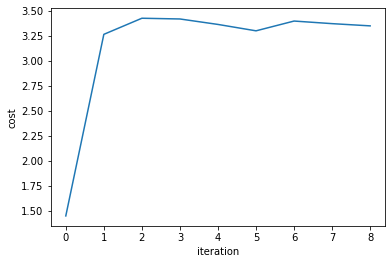

In [ ]:
A,costs=train(train_x,train_y)
plt.plot(np.arange(len(costs)), costs)
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()
